In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from time import sleep
from world import World
from agent_simple_random import Agent_simple_random 
from agent_hemilton_cycle import Agent_hemilton_cycle
import ipywidgets as widgets
from ipywidgets import interactive
%matplotlib inline
import copy

In [2]:
# %matplotlib tk
# plt.ion()

In [3]:
def game(agent, w, plot=False):
    if plot: fig, ax = plt.subplots()
    while not w.game_over:
        agent_decision = agent.move(*w.view_3_end())
        w.step(agent_decision)
        if plot:
            ax.matshow(w.obs, origin='upper')
            plt.pause(0.01)
            sleep(0.01)

    # print(f'score {w.score}, steps {w.steps}')
    #return w



def play_games(Agent_class, n):
    scores = []
    step_counts = []
    for ii in range(n):
        agent = Agent_class()
        w = World()
        game(agent, w)
        scores.append(w.score)
        step_counts.append(w.steps)

    plt.plot(scores, '.')
    plt.ylim(0,63)
    plt.ylabel('score')
    plt.xlabel('game')

In [4]:
# agent = Agent_hemilton_cycle()
agent = Agent_simple_random()
w = World()
game(agent, w, plot=False)
w 

      ◯◯        |
                |
                |
                |
                |
                |
    ░░░░░░░░░░░░|
    ░░░░░░░░░░░░| score=10 steps=122  Game Over

In [5]:
w.replay()

interactive(children=(IntSlider(value=61, description='step', max=122), Output(layout=Layout(height='450px')))…

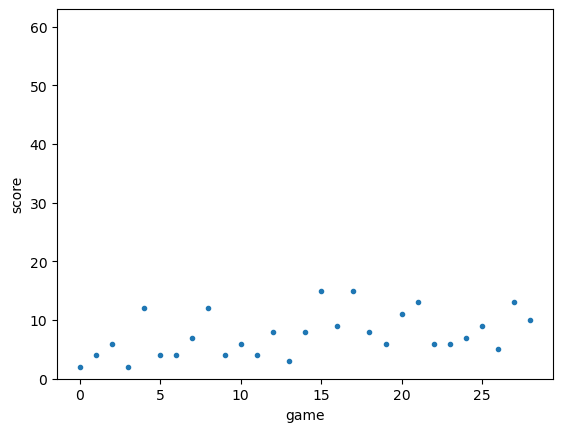

In [6]:
play_games(Agent_simple_random, 29)

In [7]:
w

      ◯◯        |
                |
                |
                |
                |
                |
    ░░░░░░░░░░░░|
    ░░░░░░░░░░░░| score=10 steps=122  Game Over

In [8]:
# 1/0

# Genetic

In [32]:
class Agent_genetic_3():
    def __init__(self):
        self.input_size = 6
        self.hidden_layers = [3]
        self.weights = []
        self.biases = []
        self._create_layer(self.input_size, self.hidden_layers[0])
        self._create_layer(self.hidden_layers[0], 3)
        self._zip = list(zip(self.weights, self.biases))

    def _create_layer(self, n_inputs, n_neurons):
        self.weights.append(0.01 * np.random.randn(n_inputs, n_neurons))
        self.biases.append(0.01 * np.random.randn(n_neurons))

    # def _create_layer(self, n_inputs, n_neurons):
    #     self.weights.append(np.ones([n_inputs, n_neurons]))
    #     self.biases.append(np.ones(n_neurons))

    def forward(self, inputs):
        activations = inputs
        for weights, biases in self._zip:
            activations = activations @ weights + biases
            activations = 1 / (1 + math.e ** (-activations))
        return activations

    
    def create_input(self, info_left, distance_left, info_forward, distance_forward, info_right, distance_right):
        pass
    
    def move(self, *args):
        input = np.array(args)
        output = self.forward(input)
        res = output.argmax() - 1
        # print(res)
        return res
    
    def mutate(self):
        mutated = copy.deepcopy(a)
        mutation_type = random.randint(0,1)
        if mutation_type == 0:
            idx1 = random.randint(0, len(self.weights)-1)
            idx2 = random.randint(0, len(self.weights[idx1])-1)
            idx3 = random.randint(0, len(self.weights[idx1][idx2])-1)
            mutated.weights[idx1][idx2, idx3] += 0.01 * np.random.randn(1)
        else:
            idx1 = random.randint(0, len(self.biases)-1)
            idx2 = random.randint(0, len(self.biases[idx1])-1)
            mutated.biases[idx1][idx2] += 0.01 * np.random.randn(1)
        return mutated
    
    
#     or biases
#     # or ac fun

In [33]:
a = Agent_genetic_3()
a_w = a.weights
a_w

[array([[-0.00933091,  0.03472061,  0.01524924],
        [-0.00582647, -0.01872315,  0.00705057],
        [ 0.01272697,  0.00522065, -0.00765157],
        [ 0.01303027, -0.01942112, -0.00756513],
        [ 0.0167188 ,  0.00434852,  0.00364049],
        [-0.0121896 , -0.01149636, -0.01859468]]),
 array([[ 0.01571522,  0.00447029,  0.0049966 ],
        [-0.01583603, -0.01470858, -0.00453316],
        [-0.01682113,  0.0068231 ,  0.00905909]])]

In [34]:
w = World()

# game(b, w, plot=True)

In [35]:
# copy pointer, deepcopy komplet

In [36]:
w.replay()

interactive(children=(IntSlider(value=0, description='step', max=0), Output(layout=Layout(height='450px'))), _…

In [58]:
class Breeder():
    def __init__(self, agent_class):
        self.agents_per_gen = 100
        self.select_percentage = 15
        self.games_per_agent = 100
        self.num_of_gens = 1000000
        self.agent_class = agent_class
        self.agents = np.array([agent_class() for x in range(self.agents_per_gen)])
        self.generation_scores = []
        self.generation_steps = []
        
   
    
    def play_round(self):
        scores = []
        steps = []
        for agent in self.agents:
            agent_scores = []
            agent_steps = []
            for gg in range(self.games_per_agent):
                w = World()
                game(agent, w)
                agent_scores.append(w.score)
                agent_steps.append(w.steps)
            scores.append(agent_scores)
            steps.append(agent_steps)
            
        self.generation_scores.append(scores)
        self.generation_steps.append(steps)
        
        self.scores = np.array(scores)
        self.steps = np.array(steps)
        

    def select_agents(self):
        n = int(math.ceil(self.select_percentage/100 * self.agents_per_gen))
        mean_scores = self.scores.mean(axis=1)
        indices = np.argsort(mean_scores)[-n:]
        return self.agents[indices]
    
    def procreate_agent(self, agent):
        agent = copy.deepcopy(agent)
        agent.mutate()
        return agent
    
    def breed(self, agents): #vybereme agenty, ktere zmutujeme
        return np.array([self.procreate_agent(random.choice(agents)) for x in range(self.agents_per_gen)])

    def create_generations(self):
        
        for generation in range(self.num_of_gens-1):
            self.play_round() #byl zde parametr agent
            selected = self.select_agents()
            self.agents = self.breed(selected)

In [59]:
br = Breeder(Agent_genetic_3)

In [65]:
br.num_of_gens = 1000

In [ ]:
%%time
br.create_generations()

In [ ]:
scores = np.array(br.generation_scores)
mean_scores = scores.mean(axis=2).mean(axis=1)
plt.plot(mean_scores)
plt.axhline(mean_scores.mean(), c="k")

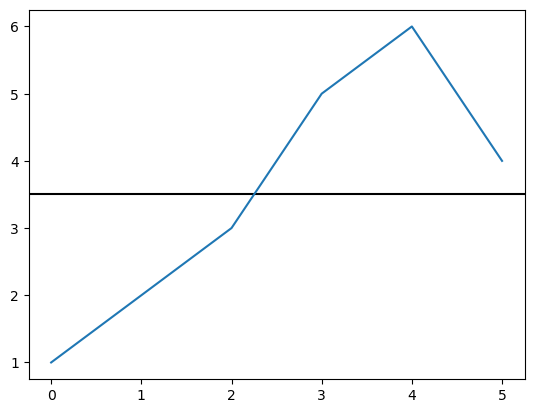

In [62]:
ll = np.array([[1], [2], [3], [5], [6], [4]])
plt.axhline(ll.mean(), c="k")
vec = np.arange(len(ll))
# plt.scatter(x,y)
plt.plot(vec, ll.mean(axis=1))


# Agent genetic

In [19]:
import numpy as np
#import tensorflow as tf
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
import sys
import numpy as  np
import matplotlib
from . import serverConfig as sc, server as srvr, clientBase as cb, enums
from modules.GeneticAI import Activation_ReLU as relu, Dense_Layer as denl
import logging, sys

class ClientGenetic(cb.ClientBase):

    # properties ------------
    server = object
    inputLayer = np.zeros(1)

    # ctor -----------

    def init(self):
        self.server = srvr.Server(sc.ServerConfig(enums.serverModes.Auto, 1, self.fpsCallback, self.newGameCallback, 10000))

    # public ------------

    def fpsCallback(self, movesRemaining):
        print(movesRemaining)

        return enums.directions.Skip

    def newGameCallback(self, gamesRemaining):
        pass

    # private ------------

    def preprocess_state(self):  # world and look_dir could be parameters
        # finding look_dir in order to know which objects are on our right etc.
        head = None
        neck = None
        body = None
        tail = None
        tail_value = 0
        world = server.getGameState().world
        size = server.getGameState().width
        #for y in range(size):
        #    for x in range(size):
        #        if world[y][x] == 1:
        #            head = [y, x]
        #            world[y][x] += 1
        #        elif world[y][x] == 2:
        #            neck = [y, x]
        #            world[y][x] += 1
        #        elif world[y][x] > 2:
        #            body = [y, x]
        #            world[y][x] += 1
        #        if world[y][x] > tail_value:
        #            tail = [y, x]
        #            tail_value = world[y][x]

        y = head[0] - neck[0]
        x = head[1] - neck[1]
        look_dir = [y, x]

        look_dirs = [[0, -1], [-1, 0], [0, 1], [1, 0]]
        look_dir_index = look_dirs.index(look_dir)
        info_left = []
        distance_left = []  # actually its positions
        info_forward = []
        distance_forward = []
        info_right = []
        distance_right = []

        for ii in range(1, 4):
            shift_left = look_dirs[look_dir_index - 1]
            pixel_left_y = head[0] + ii * (shift_left[0])
            pixel_left_x = head[1] + ii * (shift_left[1])
            if (pixel_left_x > size - 1) or (pixel_left_y > size - 1) or (pixel_left_x < 0) or (
                    pixel_left_y < 0):  # if we can still move
                info_left.append(-2)
                distance_left.append(ii)
                break
            if world[pixel_left_y][pixel_left_x] != 0:
                info_left.append(world[pixel_left_y][pixel_left_x])
                distance_left.append(ii)

        for ii in range(1, 4):
            shift_forward = look_dirs[look_dir_index]
            pixel_forward_y = head[0] + ii * (shift_forward[0])
            pixel_forward_x = head[1] + ii * (shift_forward[1])
            if (pixel_forward_x > size - 1) or (pixel_forward_y > size - 1) or (pixel_forward_x < 0) or (
                    pixel_forward_y < 0):  # if we can still move
                info_forward.append(-2)
                distance_forward.append(ii)
                break
            if world[pixel_forward_y][pixel_forward_x] != 0:
                info_forward.append(world[pixel_forward_y][pixel_forward_x])
                distance_forward.append(ii)

        for ii in range(1, 4):
            if look_dir_index == 3:
                shift_right = look_dirs[0]
            else:
                shift_right = look_dirs[look_dir_index + 1]
            pixel_right_y = head[0] + ii * (shift_right[0])
            pixel_right_x = head[1] + ii * (shift_right[1])
            if (pixel_right_x > size - 1) or (pixel_right_y > size - 1) or (pixel_right_x < 0) or (
                    pixel_right_y < 0):  # if we can still move
                info_right.append(-2)
                distance_right.append(ii)
                break
            if world[pixel_right_y][pixel_right_x] != 0:
                info_right.append(world[pixel_right_y][pixel_right_x])
                distance_right.append(ii)

        if len(distance_left) != 0:
            input_layer[0] = 1 if ((distance_left[0] == 1) and (
                        (info_left[0] > 1 and info_left[0] != tail_value) or info_left[
                    0] == -2)) else 0  # there is an obsticle on the left (distance 1)
        if len(distance_forward) != 0:
            input_layer[1] = 1 if ((distance_forward[0] == 1) and (
                        (info_forward[0] > 1 and info_forward[0] != tail_value) or info_forward[0] == -2)) else 0
        if len(distance_right) != 0:
            input_layer[2] = 1 if ((distance_right[0] == 1) and (
                        (info_right[0] > 1 and info_right[0] != tail_value) or info_right[0] == -2)) else 0
        input_layer[3] = 1 if (-1 in info_left) else 0  # food in range 3 to the right
        input_layer[4] = 1 if (-1 in info_forward) else 0
        input_layer[5] = 1 if (-1 in info_right) else 0

        return input_layer


def onehot_encode(index, length):
    a = np.zeros((length,), dtype=np.uint8)
    a[index] = 1
    return a



X = preprocess_state(GameState.world) #instead of obs


X = preprocess_state()

# Dense layer
class Layer_Dense:
 # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) #already transposed matrix of weights for every neuron
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
    # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
     # Forward pass
     def forward(self, inputs):
         # Calculate output values from input
         self.output = np.maximum(0, inputs)

dense1 = denl.Layer_Dense(6, 5)

activation1 = relu.Activation_ReLU()
#print(activation1.output)

dense1.forward(X)
#print(dense1.output)

activation1.forward(dense1.output)

print(activation1.output[:5])



#
# layer2 = Layer_Dense(5, 3)
#
#
# print(layer1)
# layer2.forward(layer1.output)
# print(layer2.output)


# In[ ]:





# In[ ]:


#output 2. vrstvy
#plan:
#batches neresime, 2 dense layers, vahy random, aktivacni fce, input, output


ImportError: attempted relative import with no known parent package